# Momentum
In this notebook there are two ways of investing one in which the top 50 stocks of the S&P 500 are chosen according to the yearly change and the other strategy is calculating the High Quality Momentum of each stock throughout a year according to the changes in 1, 3, 6 and 12 months change the result can be seen in the graph below.

One can see that some of the stocks ends up being the same yet it shows that the stock picks with the High Quality Momentum (HQM) gives a better choice alternative. 

*Note that the yearly change vs the HQM is not a comparison but more of a display of the different metrics*

<div>
<img src="output.png" width="700"/>
</div>

In [136]:
import numpy as np 
import pandas as pd
import requests
import xlsxwriter
import math
from scipy import stats

In [137]:
#Retrieving the stock symbols 
snpdata = pd.read_csv('sp500_companies.csv')
ticker_list = sorted(snpdata['Symbol'].tolist())

In [138]:
#Getting the API key and setting up the base url for this usecase
from secret import FMP_API_1
BASE_URL = "https://financialmodelingprep.com/api/v3/stock-price-change"

In [139]:
#Functions to save and load data from the API to json
import json
def save_to_json(data, filename):
    with open(filename, 'w') as json_file:
        json.dump(data, json_file, indent=4)
    print(f"Data saved to {filename}")

def load_from_json(filename):
    with open(filename, 'r') as json_file:
        data = json.load(json_file)
    print(f"Data retrieved from {filename}")
    return data


## Data Retrieval 
This section focuses on getting data from the API and placing the wanted attributes into a data frame

In [140]:
#Function to get price change data for each set of stocks
def fetch_price_change(symbols,api):
    results = []
    for symbol in symbols:
        ext = f"{BASE_URL}/{symbol}?apikey={api}"
        response = requests.get(ext)
        data = response.json()
        if data:
            results.append(data[0])
        else:
            print(f"No data found for the symbol: {symbol}")
    return results

In [145]:
#Getting the data in batches and saving them into a new json file
all_data = []
selected_symbols1 = ticker_list[:200]
selected_symbols2 = ticker_list[200:400]
selected_symbols3 = ticker_list[400:503]

# selected_symbols1 = ["AAPL", "MSFT"]
# selected_symbols2 = ["GOOG"]
# selected_symbols3 = ["AMZN", "TSLA"]
sec1 = fetch_price_change(selected_symbols1,FMP_API_1)
sec2 = fetch_price_change(selected_symbols2,FMP_API_1)
sec3 = fetch_price_change(selected_symbols3,FMP_API_1)

for sec in [sec1,sec2,sec3]:
    for stock in sec:
        all_data.append(stock)

save_to_json(all_data,"All_Change_Data")

In [24]:
change_data = load_from_json("All_Change_Data")
current_data = load_from_json("ALL_Data_29th")

Data retrieved from All_Change_Data
Data retrieved from ALL_Data_29th


In [54]:
#Creating the data frame for One year change 
columns = ['Symbol', 'Price', 'One Year Change', 'Number of Shares to Buy' ]

new_dataframe = pd.DataFrame(columns=columns)

for idx in range(len(ticker_list)):

    new_row = pd.Series(
        [
            ticker_list[idx],                  
            current_data[idx]['price'],          
            change_data[idx]['1Y']/100,         
            "NOS"        
        ],
        index=columns
    )
    new_dataframe = pd.concat([new_dataframe, new_row.to_frame().T], ignore_index=True)

new_dataframe = new_dataframe.sort_values("One Year Change", ascending=False)[:50]
new_dataframe


,Symbol,Price,One Year Change,Number of Shares to Buy
374,PLTR,79.08,3.56152,NOS
475,VST,139.68,2.621487,NOS
344,NVDA,137.01,1.787835,NOS
202,GEV,333.8,1.506133,NOS
457,UAL,99.65,1.384578,NOS
47,AXON,610.98,1.361881,NOS
44,AVGO,241.75,1.135987,NOS
443,TPL,1145.12,1.067717,NOS
445,TRGP,177.36,1.065494,NOS
235,HWM,111.23,1.035548,NOS


In [55]:
#Chosing the top 50 stocks according to yearly change and the amount of shares to buy
savings = 1000000
cut_per_stock = savings / len(new_dataframe.index)

for stock_idx in new_dataframe.index:
    # print(stock_idx)
    new_dataframe.loc[stock_idx, 'Number of Shares to Buy'] = math.floor(cut_per_stock/new_dataframe.loc[stock_idx, 'Price'])

new_dataframe

,Symbol,Price,One Year Change,Number of Shares to Buy
374,PLTR,79.08,3.56152,252
475,VST,139.68,2.621487,143
344,NVDA,137.01,1.787835,145
202,GEV,333.8,1.506133,59
457,UAL,99.65,1.384578,200
47,AXON,610.98,1.361881,32
44,AVGO,241.75,1.135987,82
443,TPL,1145.12,1.067717,17
445,TRGP,177.36,1.065494,112
235,HWM,111.23,1.035548,179


## Percentile Data Frame
In this section another data fram is set up this time with the percentile change in order to calculate the High Quality Momentum

In [146]:
#Data frame setup for the percentile change
columns = ['Symbol', 'Price', 'Number of Shares to Buy',
            'One Year Change',
            'One Year Percentile',
            'Six Months Change',
            'Six Months Percentile',
            'Three Months Change',
            'Three Months Percentile',
            'One Month Change',
            'One Month Percentile', 
            'High Q-Momentum'
            ]
percent_dataframe = pd.DataFrame(columns=columns)

def precentile_score(tframe):
    return stats.percentileofscore(tframe,tframe)

for idx in range(len(ticker_list)):

    new_row = pd.Series(
        [
            ticker_list[idx],                  
            current_data[idx]['price'],  
            # math.floor(cut_per_stock/current_data[idx]['price']),      
            "NOS",
            change_data[idx]['1Y'], 
            "NOS",        
            change_data[idx]['6M'],         
            "NOS",        
            change_data[idx]['3M'],         
            "NOS",        
            change_data[idx]['1M'],         
            "NOS",
            "NOS"
        ],
        index=columns
    )
    percent_dataframe = pd.concat([percent_dataframe, new_row.to_frame().T], ignore_index=True)

percent_dataframe


,Symbol,Price,Number of Shares to Buy,One Year Change,One Year Percentile,Six Months Change,Six Months Percentile,Three Months Change,Three Months Percentile,One Month Change,One Month Percentile,High Q-Momentum
0,A,135.54,NOS,-3.17838,NOS,5.44741,NOS,-8.33788,NOS,-2.63101,NOS,NOS
1,AAPL,255.59,NOS,34.8955,NOS,15.53403,NOS,10.70244,NOS,5.51553,NOS,NOS
2,ABBV,178.01,NOS,11.18759,NOS,4.3024,NOS,-9.77864,NOS,-2.85902,NOS,NOS
3,ABNB,133.385,NOS,-2.28287,NOS,-13.33509,NOS,4.7342,NOS,-3.45309,NOS,NOS
4,ABT,114.99,NOS,2.96768,NOS,9.60271,NOS,-0.396266,NOS,-4.76551,NOS,NOS
...,...,...,...,...,...,...,...,...,...,...,...,...
497,XYL,117.53,NOS,2.06739,NOS,-11.79199,NOS,-13.66917,NOS,-8.46548,NOS,NOS
498,YUM,135.23,NOS,3.97582,NOS,3.4387,NOS,-3.64838,NOS,-3.44033,NOS,NOS
499,ZBH,106.87,NOS,-12.98295,NOS,-0.311438,NOS,-1.59307,NOS,-5.77163,NOS,NOS
500,ZBRA,389.07,NOS,44.1227,NOS,26.12913,NOS,6.01702,NOS,-5.10565,NOS,NOS


In [116]:
#Calculating the percentile changes and finding the High Quality Momentum for each stock 
for row in percent_dataframe.index:
    for time_period in ['One Year','Six Months','Three Months','One Month']:
        percent_dataframe.loc[row, f'{time_period} Percentile'] = stats.percentileofscore(percent_dataframe[f'{time_period} Change'], percent_dataframe.loc[row, f'{time_period} Change'])/100

for row in percent_dataframe.index:
    momentum_scores = []
    for time_period in ['One Year','Six Months','Three Months','One Month']:
        momentum_scores.append(percent_dataframe.loc[row,f'{time_period} Percentile'])
    percent_dataframe.loc[row, "High Q-Momentum"] = np.mean(momentum_scores)   
percent_dataframe

,Symbol,Price,Number of Shares to Buy,One Year Change,One Year Percentile,Six Months Change,Six Months Percentile,Three Months Change,Three Months Percentile,One Month Change,One Month Percentile,High Q-Momentum
0,A,135.54,NOS,-3.17838,0.294821,5.44741,0.458167,-8.33788,0.344622,-2.63101,0.784861,0.470618
1,AAPL,255.59,NOS,34.8955,0.810757,15.53403,0.653386,10.70244,0.834661,5.51553,0.97012,0.817231
2,ABBV,178.01,NOS,11.18759,0.531873,4.3024,0.440239,-9.77864,0.308765,-2.85902,0.770916,0.512948
3,ABNB,133.385,NOS,-2.28287,0.310757,-13.33509,0.13745,4.7342,0.717131,-3.45309,0.733068,0.474602
4,ABT,114.99,NOS,2.96768,0.384462,9.60271,0.557769,-0.396266,0.559761,-4.76551,0.64741,0.537351
...,...,...,...,...,...,...,...,...,...,...,...,...
497,XYL,117.53,NOS,2.06739,0.364542,-11.79199,0.155378,-13.66917,0.199203,-8.46548,0.360558,0.26992
498,YUM,135.23,NOS,3.97582,0.404382,3.4387,0.420319,-3.64838,0.466135,-3.44033,0.73506,0.506474
499,ZBH,106.87,NOS,-12.98295,0.165339,-0.311438,0.348606,-1.59307,0.531873,-5.77163,0.589641,0.408865
500,ZBRA,389.07,NOS,44.1227,0.886454,26.12913,0.858566,6.01702,0.737052,-5.10565,0.623506,0.776394


In [117]:
percent_dataframe = percent_dataframe.sort_values('High Q-Momentum', ascending=False)[:50]
percent_dataframe

,Symbol,Price,Number of Shares to Buy,One Year Change,One Year Percentile,Six Months Change,Six Months Percentile,Three Months Change,Three Months Percentile,One Month Change,One Month Percentile,High Q-Momentum
374,PLTR,79.08,NOS,356.15199,1.0,192.23338,1.0,107.4328,1.0,12.74597,0.99004,0.99751
450,TSLA,431.66,NOS,62.5634,0.948207,92.43305,0.992032,56.515,0.996016,17.00081,0.996016,0.983068
44,AVGO,241.75,NOS,113.59867,0.988048,41.29693,0.952191,38.43673,0.988048,43.04047,1.0,0.982072
444,TPR,65.87,NOS,71.15536,0.960159,55.58466,0.986056,41.07104,0.99004,4.89724,0.966135,0.975598
457,UAL,99.65,NOS,138.45776,0.992032,100.91041,0.996016,72.99127,0.998008,0.278839,0.900398,0.971614
202,GEV,333.8,NOS,150.61333,0.994024,96.35267,0.994024,28.22282,0.972112,-1.55333,0.856574,0.954183
130,DECK,207.11,NOS,80.79765,0.968127,28.76617,0.894422,30.50379,0.98008,3.6385,0.954183,0.949203
198,GDDY,203.45,NOS,91.62136,0.976096,39.4841,0.944223,28.86524,0.974104,-0.10123,0.888446,0.945717
195,FTNT,96.08,NOS,63.51679,0.952191,57.86132,0.99004,23.51941,0.956175,-0.599684,0.87251,0.942729
191,FOX,46.63,NOS,62.54442,0.946215,43.83648,0.964143,17.28205,0.912351,2.25799,0.948207,0.942729


In [122]:
#Deciding the number of shares to buy from each stock with X amount of savings
savings = 10000000
cut_per_stock = savings / len(new_dataframe.index)


for stock in percent_dataframe.index:
    percent_dataframe.loc[stock, 'Number of Shares to Buy'] = math.floor(cut_per_stock/percent_dataframe.loc[stock,'Price'])

percent_dataframe

,Symbol,Price,Number of Shares to Buy,One Year Change,One Year Percentile,Six Months Change,Six Months Percentile,Three Months Change,Three Months Percentile,One Month Change,One Month Percentile,High Q-Momentum
374,PLTR,79.08,229,356.15199,1.0,192.23338,1.0,107.4328,1.0,12.74597,0.99004,0.99751
450,TSLA,431.66,41,62.5634,0.948207,92.43305,0.992032,56.515,0.996016,17.00081,0.996016,0.983068
44,AVGO,241.75,74,113.59867,0.988048,41.29693,0.952191,38.43673,0.988048,43.04047,1.0,0.982072
444,TPR,65.87,275,71.15536,0.960159,55.58466,0.986056,41.07104,0.99004,4.89724,0.966135,0.975598
457,UAL,99.65,181,138.45776,0.992032,100.91041,0.996016,72.99127,0.998008,0.278839,0.900398,0.971614
202,GEV,333.8,54,150.61333,0.994024,96.35267,0.994024,28.22282,0.972112,-1.55333,0.856574,0.954183
130,DECK,207.11,87,80.79765,0.968127,28.76617,0.894422,30.50379,0.98008,3.6385,0.954183,0.949203
198,GDDY,203.45,89,91.62136,0.976096,39.4841,0.944223,28.86524,0.974104,-0.10123,0.888446,0.945717
195,FTNT,96.08,188,63.51679,0.952191,57.86132,0.99004,23.51941,0.956175,-0.599684,0.87251,0.942729
191,FOX,46.63,388,62.54442,0.946215,43.83648,0.964143,17.28205,0.912351,2.25799,0.948207,0.942729


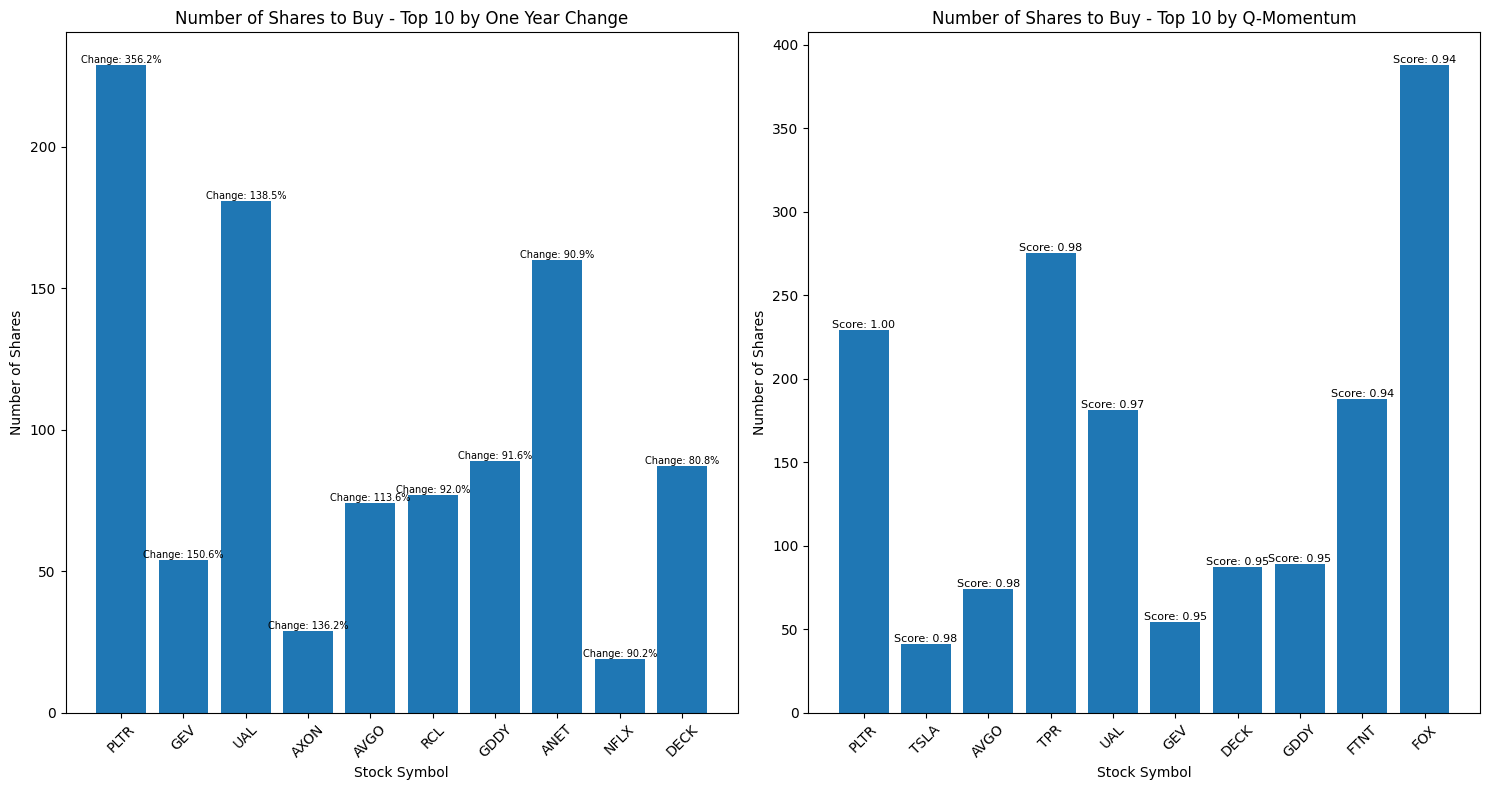

In [135]:
#Quick graph display in order to show the difference in the stock picks 
#The change matrics and number of stocks are not as relevant
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))


ax1 = plt.subplot(1,2,1)
top_10_yearly = percent_dataframe.nlargest(10, 'One Year Change')
bars1 = ax1.bar(top_10_yearly['Symbol'], top_10_yearly['Number of Shares to Buy'])
ax1.set_title('Number of Shares to Buy - Top 10 by One Year Change')
ax1.set_xlabel('Stock Symbol')
ax1.set_ylabel('Number of Shares')
ax1.tick_params(axis='x', rotation=45)


for bar, change in zip(bars1, top_10_yearly['One Year Change']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'Change: {change:.1f}%',
             ha='center', va='bottom',fontsize= 7)

ax2 = plt.subplot(1,2,2)
top_10_momentum = percent_dataframe.head(10)
bars2 = ax2.bar(top_10_momentum['Symbol'], top_10_momentum['Number of Shares to Buy'])
ax2.set_title('Number of Shares to Buy - Top 10 by Q-Momentum')
ax2.set_xlabel('Stock Symbol')
ax2.set_ylabel('Number of Shares')
ax2.tick_params(axis='x', rotation=45)


for bar, momentum in zip(bars2, top_10_momentum['High Q-Momentum']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'Score: {momentum:.2f}',
             ha='center', va='bottom',fontsize= 8)

plt.tight_layout()
plt.show()
